# Analysis on the data

In [1]:
import seaborn as sns
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import Cleaning as clean
os.chdir("..") #permet de retourner d'un chemin d'acces en arriere. Ne run qu'une seule fois sinon les chemins vont beuguer
import re
import Funcs as funcs

In [2]:
meta_pws = pd.read_csv("Data/Clean_data/metatablehour_tot.csv")
df_clean  = clean.import_csv('Data/Clean_data/data_total_month_clean_2023.csv')
df_clean.head()


module_id module_type      timezone country  altitude    city  \
0  05_00_00_02_04_92   NAModule3  Europe/Paris      FR       513  Loisin   
1  05_00_00_02_04_92   NAModule3  Europe/Paris      FR       513  Loisin   
2  05_00_00_02_04_92   NAModule3  Europe/Paris      FR       513  Loisin   
3  05_00_00_09_0f_24   NAModule3  Europe/Paris      FR       530   Lully   
4  05_00_00_09_0f_24   NAModule3  Europe/Paris      FR       530   Lully   

             street measurement                      time  value  \
0   Rue de la Canne  rain_60min 2023-04-01 10:20:02+00:00  0.000   
1   Rue de la Canne    rain_24h 2023-04-01 10:20:02+00:00  3.939   
2   Rue de la Canne   rain_live 2023-04-01 10:20:02+00:00  0.000   
3  Impasse du Terne  rain_60min 2023-04-01 10:16:49+00:00  0.000   
4  Impasse du Terne    rain_24h 2023-04-01 10:16:49+00:00  2.727   

                     geometry  longitude   latitude  
0  POINT (6.314944 46.272607)   6.314944  46.272607  
1  POINT (6.314944 46.272607)   6.314944  46.272607  
2  POINT (6.314944 46.272607)   6.314944  46.272607  
3   POINT (6.41138 46.291542)   6.411380  46.291542  
4   POINT (6.41138 46.291542)   6.411380  46.291542

In [3]:
pd.read_csv("Data/Clean_data/metatablehour_tot.csv")

ID       lon        lat  altitude
0    05_00_00_00_03_84  6.362294  46.164563       597
1    05_00_00_00_04_44  6.094004  46.181375       428
2    05_00_00_00_0b_98  6.237484  46.191136       440
3    05_00_00_00_15_46  6.118505  46.147949       474
4    05_00_00_00_15_e6  6.002537  46.274946       599
..                 ...       ...        ...       ...
260  05_00_00_0b_35_48  6.033132  46.306054       594
261  05_00_00_0b_45_7c  6.238191  46.195931       439
262  05_00_00_0b_67_0c  6.140975  46.282925       423
263  05_00_00_0b_75_ea  6.056366  46.164401       452
264  05_00_00_0b_7a_a2  6.033414  46.306328       590

[265 rows x 4 columns]

In [4]:
os.getcwd()

'c:\\Users\\arian\\OneDrive\\Documents\\cours\\M1S2\\design_gitlab'

# Analysis on dfclean

In [5]:
#montrer qu'on a résolu les pbs des raw data
clean.print_information(df_clean)

date de début : 2023-04-01 08:56:34+00:00
date de fin : 2023-12-31 23:49:18+00:00
Les mois présents sont : [ 4  5  6  7  8  9 10 11 12]
La taille du df est de :(8803271, 13)
il y a 265 stations


In [6]:
print(f'il y a {len(df_clean.city.unique())} villes différentes.')
print(f'il y a {len(df_clean.value.unique())} valeurs de précipitation différentes.') 
print(f"Il y a {len(df_clean)} lignes")

il y a 118 villes différentes.
il y a 719 valeurs de précipitation différentes.
Il y a 8803271 lignes


In [7]:
df_clean.describe()

altitude         value     longitude      latitude
count  8.803271e+06  8.803271e+06  8.803271e+06  8.803271e+06
mean   5.595436e+02  5.223050e-01  6.149928e+00  4.620897e+01
std    1.585583e+02  4.125435e+00  1.560128e-01  9.203742e-02
min    3.550000e+02  0.000000e+00  5.882286e+00  4.607928e+01
25%    4.500000e+02  0.000000e+00  6.017674e+00  4.613263e+01
50%    5.130000e+02  0.000000e+00  6.142869e+00  4.618258e+01
75%    6.250000e+02  0.000000e+00  6.290734e+00  4.627495e+01
max    1.167000e+03  3.309568e+03  6.411380e+00  4.640446e+01

### Rain_live analysis

In [8]:
df_live = df_clean[df_clean['measurement']=="rain_live"]
df_live.describe()

altitude         value     longitude      latitude
count  2.932553e+06  2.932553e+06  2.932553e+06  2.932553e+06
mean   5.595509e+02  1.195250e-02  6.149928e+00  4.620897e+01
std    1.585653e+02  1.938843e+00  1.560189e-01  9.203904e-02
min    3.550000e+02  0.000000e+00  5.882286e+00  4.607928e+01
25%    4.500000e+02  0.000000e+00  6.017674e+00  4.613263e+01
50%    5.130000e+02  0.000000e+00  6.142869e+00  4.618258e+01
75%    6.250000e+02  0.000000e+00  6.290734e+00  4.627495e+01
max    1.167000e+03  3.308760e+03  6.411380e+00  4.640446e+01

In [9]:
print(f"There are {len(df_live)} data points")

There are 2932553 data points


<Axes: ylabel='value'>

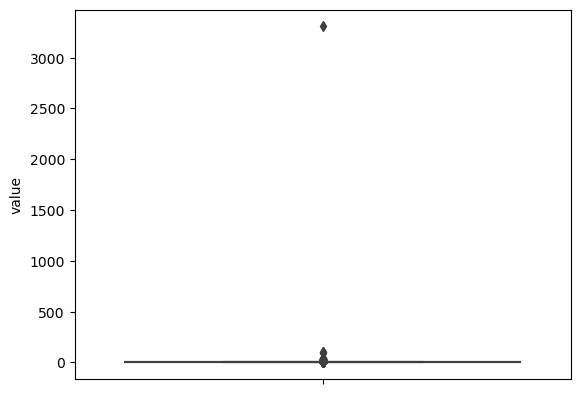

In [10]:
sns.boxplot(data=df_live, y ="value")

c:\Users\arian\anaconda3\envs\design\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


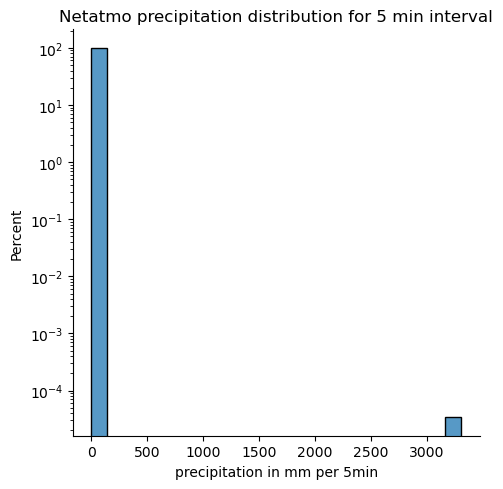

In [11]:
sns.displot(data=df_live, x ="value",kind ="hist", stat = "percent")

plt.title("Netatmo precipitation distribution for 5 min interval")
# convert y-axis to Logarithmic scale 
plt.yscale("log")
plt.xlabel("precipitation in mm per 5min")
plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()

On observe une valeur absolument abberrante à plus de 3000 mm 

### Rain_60 (df60) analysis

In [12]:
df60 = df_clean[df_clean["measurement"]== "rain_60min"]
df60

module_id module_type       timezone country  altitude  \
0        05_00_00_02_04_92   NAModule3   Europe/Paris      FR       513   
3        05_00_00_09_0f_24   NAModule3   Europe/Paris      FR       530   
6        05_00_00_09_d6_60   NAModule3  Europe/Zurich      CH       395   
9        05_00_00_00_e2_44   NAModule3   Europe/Paris      FR       420   
12       05_00_00_09_81_a8   NAModule3   Europe/Paris      FR       435   
...                    ...         ...            ...     ...       ...   
8803256  05_00_00_09_91_3c   NAModule3  Europe/Zurich      CH       447   
8803259  05_00_00_00_6a_8e   NAModule3  Europe/Zurich      CH       417   
8803262  05_00_00_03_09_7c   NAModule3  Europe/Zurich      CH       429   
8803265  05_00_00_05_69_00   NAModule3   Europe/Paris      FR       459   
8803268  05_00_00_03_09_08   NAModule3   Europe/Paris      FR       454   

                    city                 street measurement  \
0                 Loisin        Rue de la Canne  rain_60min   
3                  Lully       Impasse du Terne  rain_60min   
6                 Coppet    Chemin des Levrayes  rain_60min   
9        Chens-sur-Léman       Route d'Hermance  rain_60min   
12              Massongy         Route du Bourg  rain_60min   
...                  ...                    ...         ...   
8803256          Satigny  Route de Maison-Rouge  rain_60min   
8803259          Vernier         Route de Peney  rain_60min   
8803262          Vernier   Chemin des Vidollets  rain_60min   
8803265            Sergy  Chemin des Tournesols  rain_60min   
8803268            Moëns    Clos de la Corbière  rain_60min   

                             time  value  \
0       2023-04-01 10:20:02+00:00  0.000   
3       2023-04-01 10:16:49+00:00  0.000   
6       2023-04-01 10:20:16+00:00  0.000   
9       2023-04-01 10:19:32+00:00  0.202   
12      2023-04-01 10:20:03+00:00  0.303   
...                           ...    ...   
8803256 2023-12-31 23:41:44+00:00  0.000   
8803259 2023-12-31 23:45:00+00:00  0.000   
8803262 2023-12-31 23:45:54+00:00  0.000   
8803265 2023-12-31 23:47:17+00:00  0.000   
8803268 2023-12-31 23:47:33+00:00  0.000   

                                          geometry  longitude   latitude  
0                       POINT (6.314944 46.272607)   6.314944  46.272607  
3                        POINT (6.41138 46.291542)   6.411380  46.291542  
6                       POINT (6.191184 46.324417)   6.191184  46.324417  
9                       POINT (6.258015 46.309791)   6.258015  46.309791  
12                      POINT (6.333053 46.312535)   6.333053  46.312535  
...                                            ...        ...        ...  
8803256  POINT (6.01930570602417 46.2057838439941)   6.019306  46.205784  
8803259                 POINT (6.060344 46.206879)   6.060344  46.206879  
8803262                 POINT (6.075102 46.208486)   6.075102  46.208486  
8803265  POINT (6.00567519664764 46.2485095901196)   6.005675  46.248510  
8803268                 POINT (6.093834 46.260518)   6.093834  46.260518  

[2937781 rows x 13 columns]

Petite comparaisons entre les differents dataframe.

In [13]:
print(f"Il y a {len(df60)} points de données pour rain 60. Nous avions {len(df_live)} données pour Rain live")
print(f"Il y a {len(df_clean[df_clean["measurement"]== "rain_24h"])} points de données pour rain 24.")
print(f"Ce qui nous fait une difference de {len(df60)-len(df_live) } points de donnees entre rain_live et rain_60")

Il y a 2937781 points de données pour rain 60. Nous avions 2932553 données pour Rain live
Il y a 2932937 points de données pour rain 24.
Ce qui nous fait une difference de 5228 points de donnees entre rain_live et rain_60


<Axes: ylabel='value'>

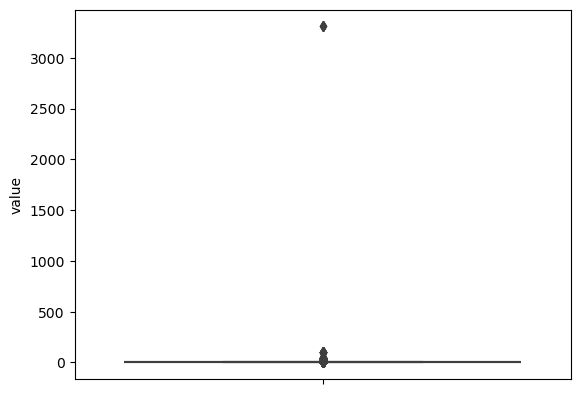

In [14]:
sns.boxplot(data=df60, y ="value")

c:\Users\arian\anaconda3\envs\design\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 9.444444444444438, 'precipitation in mm per hour')

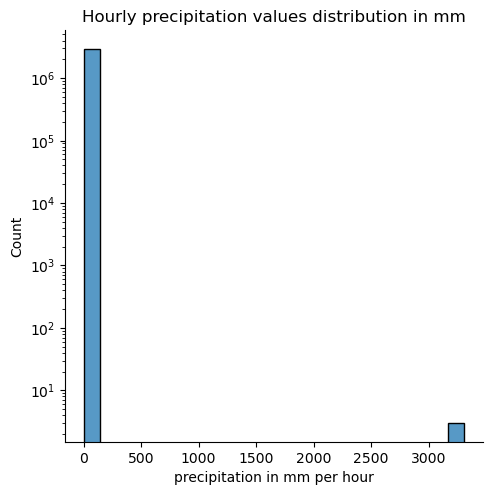

In [15]:
sns.displot(data=df60, x ="value",kind ="hist")

plt.title("Hourly precipitation values distribution in mm")
# convert y-axis to Logarithmic scale 
plt.yscale("log")
plt.xlabel("precipitation in mm per hour")

On retrouve toujours les valeurs abberantes a plus de 3000 mm/h verifions a quelle donnee cela correspond

In [16]:
df_clean[df_clean.value >1000]

module_id module_type      timezone country  altitude  \
4933784  05_00_00_06_b5_28   NAModule3  Europe/Paris      FR       459   
4933785  05_00_00_06_b5_28   NAModule3  Europe/Paris      FR       459   
4933786  05_00_00_06_b5_28   NAModule3  Europe/Paris      FR       459   
4934015  05_00_00_06_b5_28   NAModule3  Europe/Paris      FR       459   
4934016  05_00_00_06_b5_28   NAModule3  Europe/Paris      FR       459   
4934699  05_00_00_06_b5_28   NAModule3  Europe/Paris      FR       459   
4934700  05_00_00_06_b5_28   NAModule3  Europe/Paris      FR       459   

                   city          street measurement                      time  \
4933784  Reignier-Ésery  Chemin de Cery  rain_60min 2023-09-01 04:09:48+00:00   
4933785  Reignier-Ésery  Chemin de Cery    rain_24h 2023-09-01 04:09:48+00:00   
4933786  Reignier-Ésery  Chemin de Cery   rain_live 2023-09-01 04:09:48+00:00   
4934015  Reignier-Ésery  Chemin de Cery  rain_60min 2023-09-01 04:13:58+00:00   
4934016  Reignier-Ésery  Chemin de Cery    rain_24h 2023-09-01 04:13:58+00:00   
4934699  Reignier-Ésery  Chemin de Cery  rain_60min 2023-09-01 04:39:24+00:00   
4934700  Reignier-Ésery  Chemin de Cery    rain_24h 2023-09-01 04:39:24+00:00   

            value                    geometry  longitude   latitude  
4933784  3308.760  POINT (6.290734 46.142929)   6.290734  46.142929  
4933785  3308.760  POINT (6.290734 46.142929)   6.290734  46.142929  
4933786  3308.760  POINT (6.290734 46.142929)   6.290734  46.142929  
4934015  3309.568  POINT (6.290734 46.142929)   6.290734  46.142929  
4934016  3309.568  POINT (6.290734 46.142929)   6.290734  46.142929  
4934699  3309.568  POINT (6.290734 46.142929)   6.290734  46.142929  
4934700  3309.568  POINT (6.290734 46.142929)   6.290734  46.142929

In [17]:
test = df60[(df60.module_id == "05_00_00_06_b5_28") & (df60.time.dt.month == 9) ]

Il semble qu'il y ait eu un probleme le 1er septembre avec la station 05_00_00_06_b5_28. Cet excès n'est cependant pas present dans pws_houry_total car il est trop loin de l'heure pile.

Bardossy et al. 2021 l'expliquent de la manière suivante: "This was caused by an interrupted connection between the rain sensor and the base station. In this case, the total sum of the precipitation over a longer time period was transferred at once (i.e. in one single measurement interval) when the connection was reestablished." 

# Analyse sur pws_hourly_total

### Analyse sur les données manquantes

In [18]:
pws_hourly_total = pd.read_csv('Data/Clean_data/pws_hourly_total.csv')
pws_hourly_total.head()

time  05_00_00_00_03_84  05_00_00_00_04_44  \
0  2023-04-01 09:00:00                NaN                NaN   
1  2023-04-01 10:00:00                NaN              0.000   
2  2023-04-01 11:00:00                NaN              0.505   
3  2023-04-01 12:00:00                NaN                NaN   
4  2023-04-01 13:00:00                NaN              0.101   

   05_00_00_00_0b_98  05_00_00_00_15_46  05_00_00_00_15_e6  05_00_00_00_17_e0  \
0                NaN                NaN                NaN                NaN   
1                NaN                NaN                NaN                NaN   
2                NaN                NaN                NaN                NaN   
3                NaN                NaN                NaN                NaN   
4                NaN                NaN                NaN                NaN   

   05_00_00_00_17_f4  05_00_00_00_1d_5e  05_00_00_00_2c_4a  ...  \
0                NaN                NaN                NaN  ...   
1                NaN                NaN                NaN  ...   
2                NaN                NaN                0.0  ...   
3                NaN              0.606                NaN  ...   
4                NaN                NaN                NaN  ...   

   05_00_00_0a_c1_6e  05_00_00_0a_c5_2a  05_00_00_0a_ec_d8  05_00_00_0b_03_84  \
0                NaN                NaN                NaN                NaN   
1                NaN                NaN                NaN                NaN   
2                NaN                NaN                NaN                NaN   
3                NaN                NaN                NaN                NaN   
4                NaN                NaN                NaN                NaN   

   05_00_00_0b_0c_0e  05_00_00_0b_35_48  05_00_00_0b_45_7c  05_00_00_0b_67_0c  \
0                NaN                NaN                NaN                NaN   
1                NaN                NaN                NaN                NaN   
2                NaN                NaN                NaN                NaN   
3                NaN                NaN                NaN                NaN   
4                NaN                NaN                NaN                NaN   

   05_00_00_0b_75_ea  05_00_00_0b_7a_a2  
0                NaN                NaN  
1                NaN                NaN  
2                NaN                NaN  
3                NaN                NaN  
4                NaN                NaN  

[5 rows x 266 columns]

NàN analysis

In [19]:
# nombre absolue + pourcentage
#Ndataset_rain_60 is pws_hourly without the column time
Ndataset_rain60 = pws_hourly_total.iloc[:,1:]
NaN_nbr = Ndataset_rain60.isna().sum().sum()
values_nbr = Ndataset_rain60.size
Nan_percent = NaN_nbr/values_nbr*100
print('Ndataset_Rain60 contient : ', NaN_nbr,' NàN sur ',values_nbr,' valeurs, soit ', Nan_percent, '% de NàN')

Ndataset_Rain60 contient :  1222393  NàN sur  1746615  valeurs, soit  69.98640226953277 % de NàN


c:\Users\arian\anaconda3\envs\design\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Occurence des longueurs de trou de données dans pws_hourly')

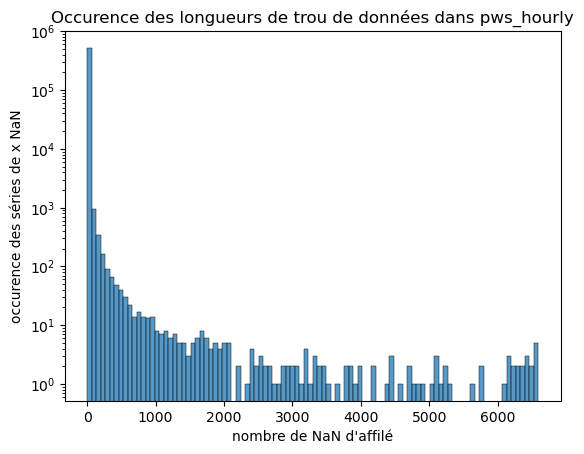

In [20]:
# affichage de l'occurence d'apparition des series de x NaN d'affilé sur l'ensemble du dataset


nb_consecutive_nans = [] #initialisation du dataframe pour stocker les résultats
for col in Ndataset_rain60.columns:
    consecutive_nans = Ndataset_rain60[col].isnull().astype(int).groupby(Ndataset_rain60[col].notnull().astype(int).cumsum()).sum() #dataframe de int correspondant à la longuer de chaque trou de données
    consecutive_nans = list(consecutive_nans)  #conversion en liste
    nb_consecutive_nans += consecutive_nans #ajout à la liste global

sns.histplot(nb_consecutive_nans, bins=100)
plt.yscale('log')
plt.xlabel("nombre de NaN d'affilé")
plt.ylabel('occurence des séries de x NaN')
plt.title('Occurence des longueurs de trou de données dans pws_hourly')


nombre de données par stations

Ndataset have  6591 rows
Le nombre maximal de donnée dans une station est de  6268


c:\Users\arian\anaconda3\envs\design\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


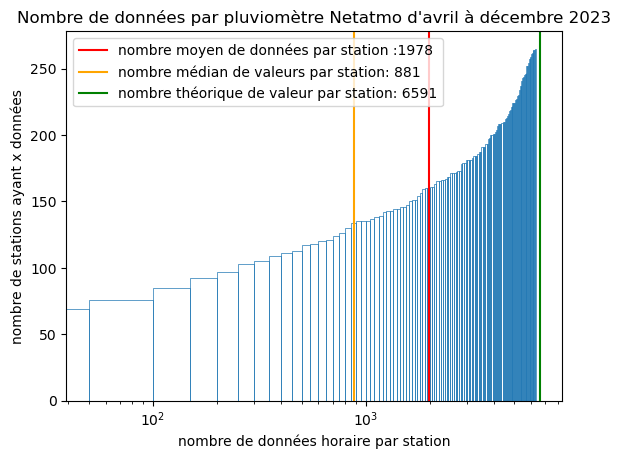

In [39]:
# nombre de station
nbr_rows = Ndataset_rain60.shape[0]
print('Ndataset have ', nbr_rows, 'rows')
#compte le nombre de données par station
occurence_per_station_total = Ndataset_rain60.count()
print(f"Le nombre maximal de donnée dans une station est de  {occurence_per_station_total.max()}")
occurence_per_station_total

sns.histplot(occurence_per_station_total, binwidth=50, fill = False, cumulative=True)
plt.axvline(Ndataset_rain60.count().mean(), color = "r", label = f"nombre moyen de données par station :{int(Ndataset_rain60.count().mean())}")
plt.axvline(Ndataset_rain60.count().median(), color = "orange", label = f"nombre médian de valeurs par station: {int(Ndataset_rain60.count().median())}")
plt.axvline(Ndataset_rain60.shape[0], color = "g", label = f"nombre théorique de valeur par station: {int(Ndataset_rain60.shape[0])}")

plt.xlabel("nombre de données horaire par station")
plt.ylabel('nombre de stations ayant x données')


plt.xscale("log")

plt.title("Nombre de données par pluviomètre Netatmo d'avril à décembre 2023")
plt.legend()

Combinen de stations ont moins de 2 mois de données ?

In [22]:
(Ndataset_rain60.count()<1440).sum()

144

Quelle station à quel pourcentage de données ?
Création d'un csv pour afficher une carte sur Qgis contenant les stations avec leurs pourcentages de donénes

In [23]:
pourcentage_de_donne = pd.DataFrame(Ndataset_rain60.count()/len(Ndataset_rain60)*100).reset_index()
meta_pws["pourcentage_de_donne"] = pourcentage_de_donne[0]
meta_pws

ID       lon        lat  altitude  pourcentage_de_donne
0    05_00_00_00_03_84  6.362294  46.164563       597              0.151722
1    05_00_00_00_04_44  6.094004  46.181375       428             40.312547
2    05_00_00_00_0b_98  6.237484  46.191136       440             42.527689
3    05_00_00_00_15_46  6.118505  46.147949       474              0.197239
4    05_00_00_00_15_e6  6.002537  46.274946       599             24.609316
..                 ...       ...        ...       ...                   ...
260  05_00_00_0b_35_48  6.033132  46.306054       594              2.624791
261  05_00_00_0b_45_7c  6.238191  46.195931       439              0.091033
262  05_00_00_0b_67_0c  6.140975  46.282925       423              2.973752
263  05_00_00_0b_75_ea  6.056366  46.164401       452              0.743438
264  05_00_00_0b_7a_a2  6.033414  46.306328       590              0.151722

[265 rows x 5 columns]

In [24]:
meta_pws.to_csv("Data/meta_and_perc_data.csv")

Serie temporelle des nans.

In [46]:
#df_stat_hour : dataframe contenant les informations de pws hourly total plus des colonnes avec des stattististiques
df_stat_hour = pws_hourly_total.copy(deep=True)
df_stat_hour["time"] = pd.to_datetime(df_stat_hour["time"])

c:\Users\arian\anaconda3\envs\design\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\arian\anaconda3\envs\design\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'nombre de valeurs manquantes')

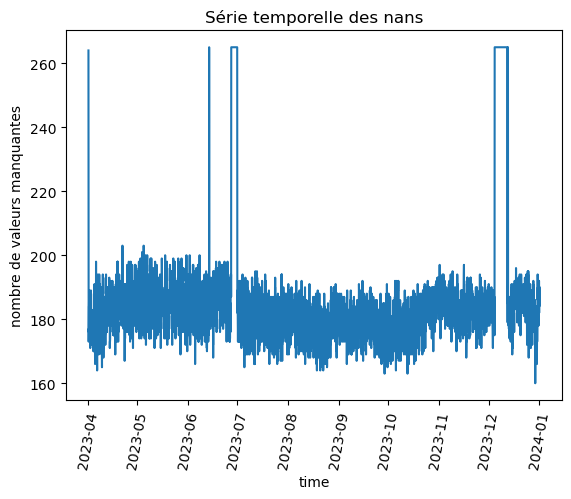

In [48]:
df_stat_hour["sum_nan"] =df_stat_hour.iloc[:,1:].isnull().sum(axis=1)

sns.lineplot(data = df_stat_hour, x="time" ,y = "sum_nan")
plt.xticks(rotation=80) 
plt.title("Série temporelle des nans")
plt.ylabel("nombre de valeurs manquantes")

On remarque qu'il y a deux periodes avec absolument aucune donnees. Il s'agit du 5 au 11 décembre et du 28 au 31 juin. Nous avons verifie et aucune données ne sont stockees dans le serveur a ces dates la. Il y a probablement eu un probleme d'appel a l'api.

Il y a deux autres journees avec beaucoup de donnees manquantes observons desquelles il s'agit.

In [49]:
df_stat_hour.loc[1:,:]["sum_nan"].idxmax()

1764

In [50]:
pd.DataFrame(df_stat_hour.loc[1764,:]).dropna()

1764
time     2023-06-13 21:00:00
sum_nan                  265

In [52]:
df_stat_hour.loc[0,:].dropna()

time                 2023-04-01 09:00:00
05_00_00_04_75_02                    0.0
sum_nan                              264
Name: 0, dtype: object

Il y a 0 valeurs le 13-06-2024 à 21h et le 1er avril à  9h du matin

### Analyse sur les précipitations

In [29]:
display(pws_hourly_total.describe())

05_00_00_00_03_84  05_00_00_00_04_44  05_00_00_00_0b_98  \
count          10.000000        2657.000000        2803.000000   
mean            0.171700           0.046224           0.216089   
std             0.362757           0.324221           2.102317   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%             0.000000           0.000000           0.000000   
75%             0.000000           0.000000           0.000000   
max             0.909000          10.201000          93.324000   

       05_00_00_00_15_46  05_00_00_00_15_e6  05_00_00_00_17_e0  \
count          13.000000        1622.000000         198.000000   
mean            0.481692           0.031944           0.575904   
std             1.706648           0.232891           1.358595   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%             0.000000           0.000000           0.000000   
75%             0.000000           0.000000           0.404000   
max             6.161000           4.444000           7.575000   

       05_00_00_00_17_f4  05_00_00_00_1d_5e  05_00_00_00_2c_4a  \
count         215.000000         155.000000          70.000000   
mean            0.074693           0.106865           0.028857   
std             0.336641           0.366742           0.206447   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%             0.000000           0.000000           0.000000   
75%             0.000000           0.000000           0.000000   
max             2.828000           2.828000           1.717000   

       05_00_00_00_30_20  ...  05_00_00_0a_c1_6e  05_00_00_0a_c5_2a  \
count         238.000000  ...           7.000000        1486.000000   
mean            0.204971  ...           0.909000           0.140353   
std             0.843670  ...           2.404988           2.734062   
min             0.000000  ...           0.000000           0.000000   
25%             0.000000  ...           0.000000           0.000000   
50%             0.000000  ...           0.000000           0.000000   
75%             0.000000  ...           0.000000           0.000000   
max            11.110000  ...           6.363000         103.525000   

       05_00_00_0a_ec_d8  05_00_00_0b_03_84  05_00_00_0b_0c_0e  \
count          36.000000        2846.000000                1.0   
mean            0.342278           0.139186                0.0   
std             0.563782           0.556821                NaN   
min             0.000000           0.000000                0.0   
25%             0.000000           0.000000                0.0   
50%             0.000000           0.000000                0.0   
75%             0.631250           0.000000                0.0   
max             1.818000           6.666000                0.0   

       05_00_00_0b_35_48  05_00_00_0b_45_7c  05_00_00_0b_67_0c  \
count         173.000000                6.0         196.000000   
mean            0.025688                0.0           0.036071   
std             0.133568                0.0           0.199525   
min             0.000000                0.0           0.000000   
25%             0.000000                0.0           0.000000   
50%             0.000000                0.0           0.000000   
75%             0.000000                0.0           0.000000   
max             1.212000                0.0           2.020000   

       05_00_00_0b_75_ea  05_00_00_0b_7a_a2  
count          49.000000               10.0  
mean            0.115429                0.0  
std             0.294463                0.0  
min             0.000000                0.0  
25%             0.000000                0.0  
50%             0.000000                0.0  
75%             0.000000                0.0  
max             1.414000

#### Distribution pws_pcp_hourly

c:\Users\arian\anaconda3\envs\design\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


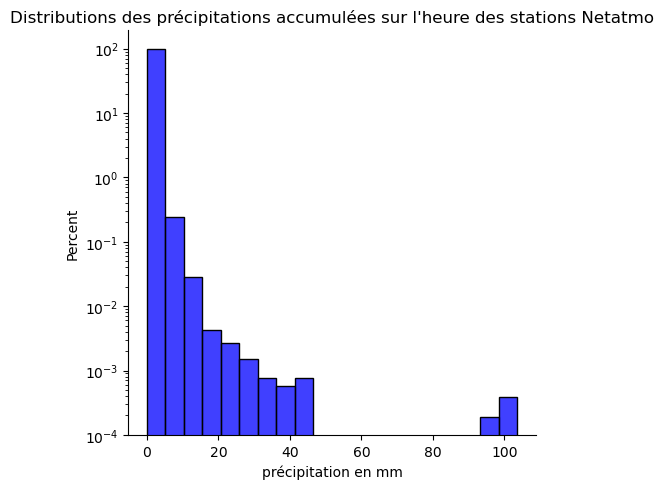

In [53]:
# convert to long (tidy) form
df_net_hour_m = pws_hourly_total.melt('time', var_name='station', value_name='vals')
clean.plot_precip(df_net_hour_m, title = "Distributions des précipitations accumulées sur l'heure des stations Netatmo")

In [54]:
df_net_hour_m.vals.isna().sum()/df_net_hour_m.vals.shape[0]

0.6998640226953278

On observe des valeurs abberantes (superieures a 60 mm /h qui a un temps de retour superieur a 50 ans)

In [55]:
#permet d'observer les valeurs abberrantes au dessus de 80
df_net_hour_m[df_net_hour_m.vals>80]

time            station     vals
18157    2023-10-25 16:00:00  05_00_00_00_0b_98   93.324
983002   2023-05-10 16:00:00  05_00_00_06_98_7e  103.020
1690056  2023-07-25 09:00:00  05_00_00_0a_c5_2a  103.525

In [56]:
pws_hourly_total[(pws_hourly_total.time== "2023-10-25 16:00:00" )| (pws_hourly_total.time== "2023-05-10 16:00:00")| (pws_hourly_total.time== "2023-07-25 09:00:00")]

time  05_00_00_00_03_84  05_00_00_00_04_44  \
943   2023-05-10 16:00:00                NaN                0.0   
2760  2023-07-25 09:00:00                NaN                NaN   
4975  2023-10-25 16:00:00                NaN                0.0   

      05_00_00_00_0b_98  05_00_00_00_15_46  05_00_00_00_15_e6  \
943                 NaN                NaN                NaN   
2760              0.000                NaN              0.101   
4975             93.324                NaN                NaN   

      05_00_00_00_17_e0  05_00_00_00_17_f4  05_00_00_00_1d_5e  \
943                 NaN                NaN                NaN   
2760                NaN                NaN                NaN   
4975                NaN                NaN                NaN   

      05_00_00_00_2c_4a  ...  05_00_00_0a_c1_6e  05_00_00_0a_c5_2a  \
943                 0.0  ...                NaN              0.000   
2760                NaN  ...                NaN            103.525   
4975                NaN  ...                NaN                NaN   

      05_00_00_0a_ec_d8  05_00_00_0b_03_84  05_00_00_0b_0c_0e  \
943                 NaN                NaN                NaN   
2760                NaN                NaN                NaN   
4975                NaN              0.101                NaN   

      05_00_00_0b_35_48  05_00_00_0b_45_7c  05_00_00_0b_67_0c  \
943                 NaN                NaN                NaN   
2760                NaN                NaN                NaN   
4975                NaN                NaN                NaN   

      05_00_00_0b_75_ea  05_00_00_0b_7a_a2  
943                 NaN                NaN  
2760                NaN                NaN  
4975                NaN                NaN  

[3 rows x 266 columns]

Ces 3 valeurs occurent lorsqu'il n'y a pas de pluie autour. C'est toujours du à l'effet mentionné au dessus pour les valeurs aberantes  à 3000mm

# Analyse sur les données de l'OCeau

In [57]:
def read_df(path = "Data/Clean_data/oceau_hour_after_april.csv"):
    df = pd.read_csv(path)
    df.time = pd.to_datetime(df.time,utc=True)
    display(df.head())
    return df

In [58]:
df_oceau = read_df(path = "Data/Clean_data/oceau_hour_after_april.csv")

time   AR   BA   CE   CR   DD   ER   ES   FO   GF   LA  \
0 2023-04-01 00:00:00+00:00  0.1  0.1  0.2  0.3  0.3  0.6  0.3  0.1  0.1  0.2   
1 2023-04-01 01:00:00+00:00  0.4  0.1  0.3  0.7  0.7  1.5  1.4  0.6  0.6  0.1   
2 2023-04-01 02:00:00+00:00  0.0  0.0  0.0  0.1  0.0  0.0  0.1  0.0  0.1  0.0   
3 2023-04-01 03:00:00+00:00  0.2  0.0  0.1  0.3  0.0  0.8  0.1  0.4  0.0  0.1   
4 2023-04-01 04:00:00+00:00  0.5  0.3  0.4  0.5  0.5  0.9  0.6  0.5  0.2  0.2   

    LC   SA  
0  0.1  0.1  
1  0.0  0.1  
2  0.1  0.0  
3  0.1  0.0  
4  0.3  0.5

c:\Users\arian\anaconda3\envs\design\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


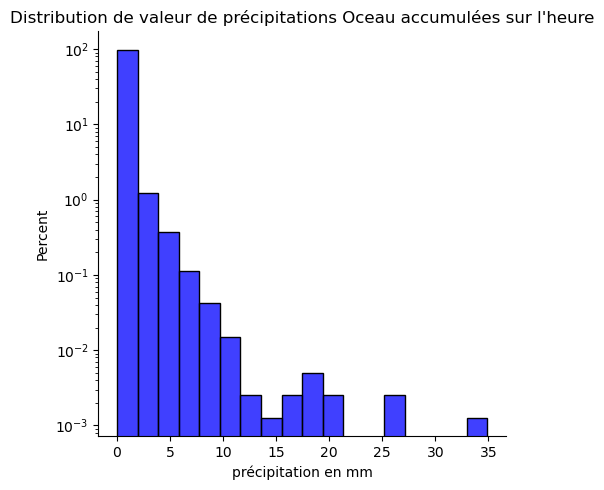

In [59]:
# convert to long (tidy) form
df_oceau_melt = df_oceau.melt('time', var_name='station', value_name='vals')
clean.plot_precip(df_oceau_melt, title = "Distribution de valeur de précipitations Oceau accumulées sur l'heure" )

In [60]:
df_oceau_melt.isna().sum()

time       0
station    0
vals       0
dtype: int64

# Comparaison of des précipitations de l'OCeau et de Netatmo

##### Simple description des données

In [82]:
#melt combine les données de chaque colonnes en une colonne dont le nom est vals
df_oceau_melt = df_oceau_melt.dropna()
funcs.give_info_for_table(df_oceau_melt, "oceau" )

Le pourcentage de 0 dans oceau  df est de: 0.8854166666666666
Le pourcentage de nan est de : 0.0
count with 0 : 79200 


vals
count  9075.000000
mean      1.052000
std       1.534278
min       0.100000
25%       0.200000
50%       0.500000
75%       1.300000
max      34.900000

In [84]:
df_net_hour_m = df_net_hour_m.dropna()
funcs.give_info_for_table(df_oceau_melt, "oceau" )

Le pourcentage de 0 dans oceau  df est de: 0.8854166666666666
Le pourcentage de nan est de : 0.0
count with 0 : 79200 


vals
count  9075.000000
mean      1.052000
std       1.534278
min       0.100000
25%       0.200000
50%       0.500000
75%       1.300000
max      34.900000

## Quantile plots

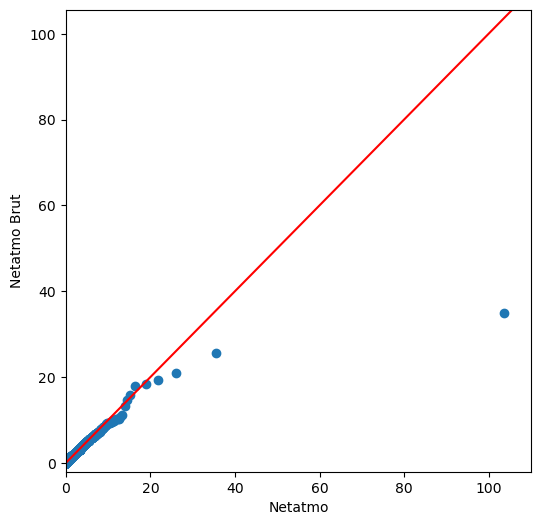

In [ ]:
funcs.QQplot(df_net_hour_m.vals,df_oceau_melt.vals,50000,label_2_sample="Netatmo Brut")

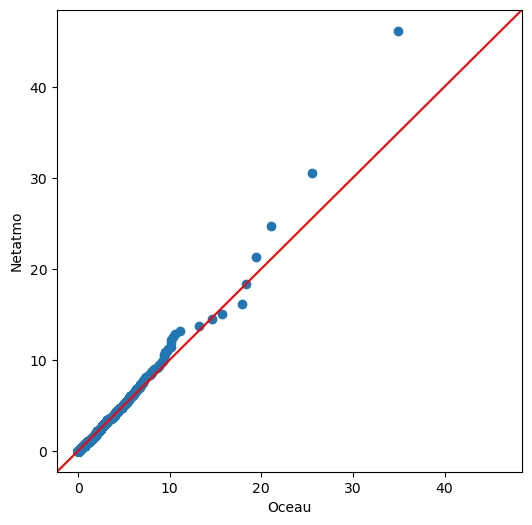

In [85]:
without_100 = df_net_hour_m[df_net_hour_m.vals <50]
funcs.QQplot(df_oceau_melt.vals,without_100.vals,50000)

## Interpolation le 2023-06-30 00:00:00+00:00


In [86]:
meta_oceau = pd.read_csv("Data/Clean_data/Metadata_oceau.csv").iloc[:,1:]
meta_oceau

ID        lat       lon
0   AR  46.197628  6.090526
1   BA  46.171112  6.128439
2   CE  46.218573  6.234509
3   CR  46.234120  6.051919
4   DD  46.200521  6.132253
5   ER  46.248790  6.129913
6   ES  46.205184  5.985325
7   FO  46.231320  6.293186
8   GF  46.199937  6.184612
9   LA  46.142289  6.132615
10  LC  46.156657  6.033086
11  SA  46.308341  6.133865

On veut faire une interpolation afin de comparer les données de l'Oceau et de Netatmo. Pour cela on cherche la la période sur l'ensemble des données Netatmo ou il a le plus plu en moyenne

In [89]:
idx_high_rain = pws_hourly_total.iloc[:,1:].mean(axis=1).idxmax()

In [90]:
pws_hourly_total.iloc[idx_high_rain,:].dropna()

time                 2023-09-13 11:00:00
05_00_00_00_6a_8e                  0.606
05_00_00_00_79_dc                  3.636
05_00_00_00_97_94                  5.858
05_00_00_00_a6_c6                    0.0
                            ...         
05_00_00_0a_90_d6                  2.424
05_00_00_0a_af_dc                 11.817
05_00_00_0a_bc_e8                  5.353
05_00_00_0a_c5_2a                  1.111
05_00_00_0b_03_84                  1.212
Name: 3962, Length: 88, dtype: object

In [93]:
df_oceau.loc[df_oceau.time == "2023-09-13 11:00:00"].iloc[:,1:]

AR   BA   CE   CR   DD   ER   ES   FO    GF   LA   LC    SA
3971  0.7  4.4  9.5  0.0  5.3  2.8  0.6  6.3  25.8  7.2  2.8  20.3

Il s'agit du 13 septembre 2023 entre 10 h et 11h

Netatmo brute

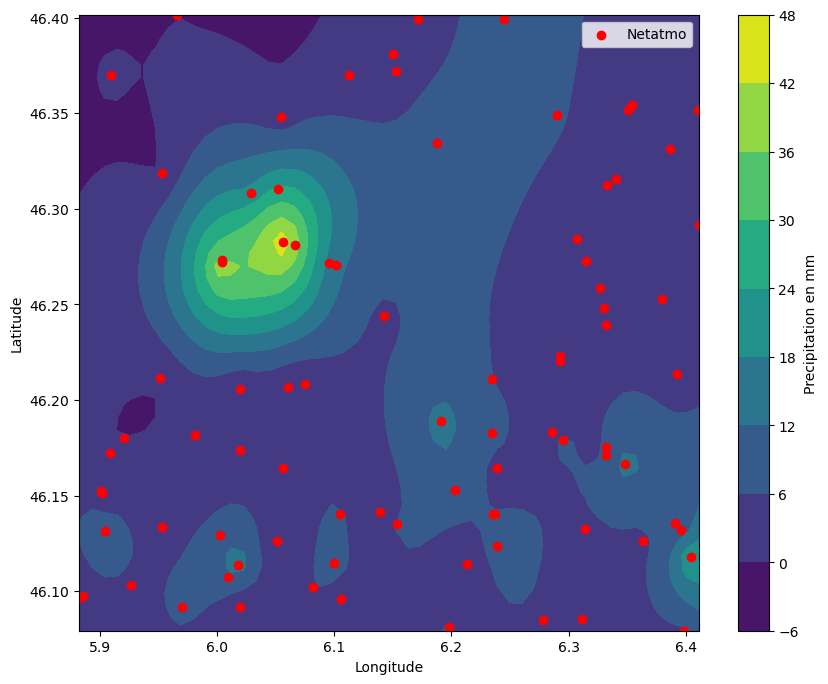

In [94]:

# Extract coordinates and values
meta_pws = meta_pws[meta_pws.ID.isin(pws_hourly_total.iloc[idx_high_rain,1:].dropna().index)]

longitude_pws = meta_pws['lon'].values
latitude_pws = meta_pws['lat'].values
precipitation_pws = np.array(pws_hourly_total.iloc[idx_high_rain,1:].dropna(), dtype=float)

# Step 3: Define the grid where you want to interpolate
x_lon = np.linspace(min(longitude_pws), max(longitude_pws), 50)
y_lat = np.linspace(min(latitude_pws), max(latitude_pws), 50)
grid_lon, grid_lat = np.meshgrid(x_lon, y_lat)

funcs.plot_interpolation(precipitation_pws, longitude_pws ,latitude_pws, x_lon,y_lat ,label ="Netatmo")

Oceau

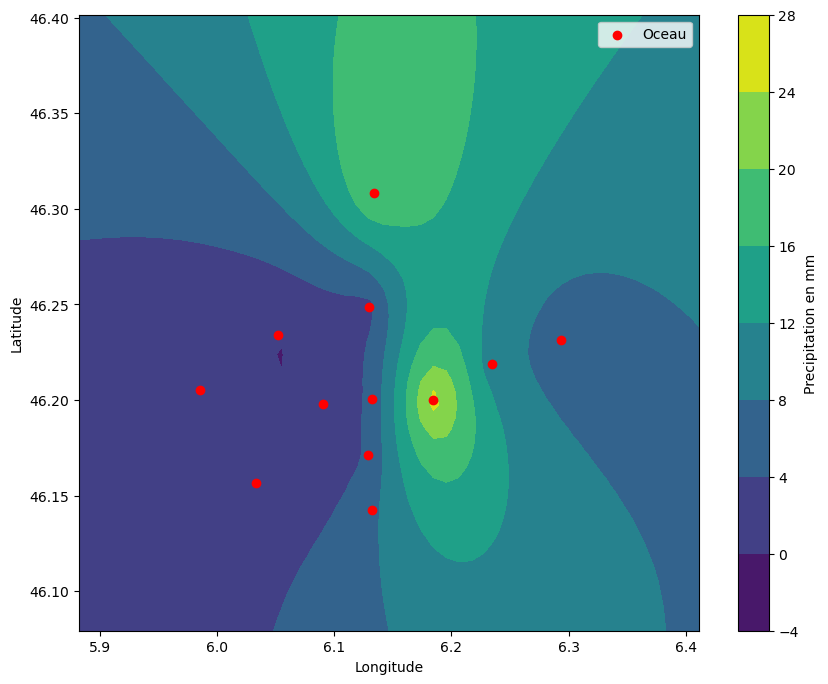

In [95]:

# Extract coordinates and values
longitude_oceau = meta_oceau['lon'].values
latitude_oceau = meta_oceau['lat'].values
precipitation_oceau = np.array(df_oceau.iloc[3971,1:].values, dtype=float)

funcs.plot_interpolation(precipitation_oceau, longitude_oceau ,latitude_oceau, x_lon,y_lat ,label="Oceau")

Interpolation avec les donnees de l'Oceau et de Netatmo

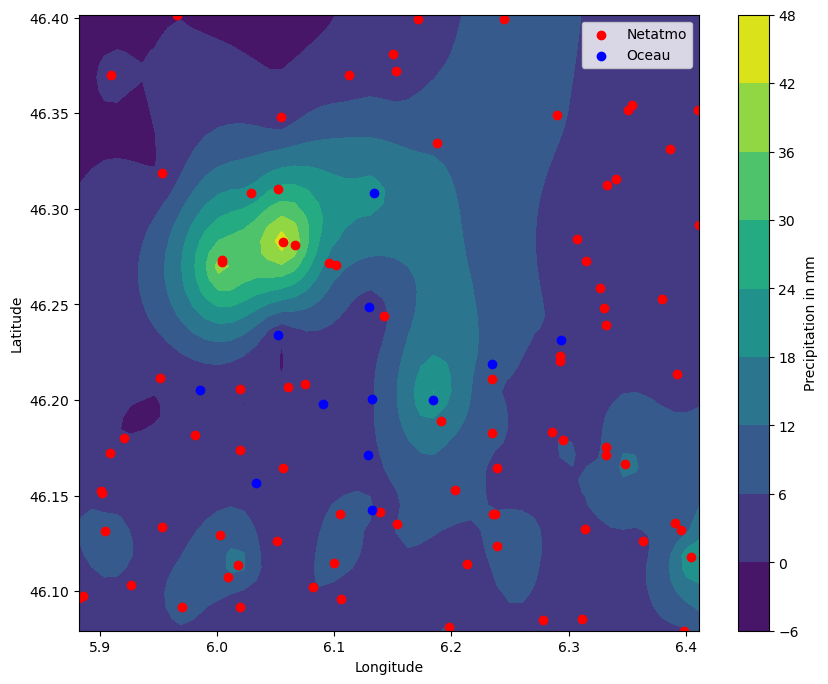

In [96]:
funcs.plot_combined_interp(longitude_pws,longitude_oceau,latitude_pws, latitude_oceau,
                         precipitation_pws,precipitation_oceau,x_lon,y_lat)